In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [13]:
# Define the folder path
folder_path = "results/AF221"

In [14]:
# df_combined_clean = pd.read_csv(f'{folder_path}/all_results_combined_new_15_21-30_noNs.csv')

# df_combined_clean['unique_read'] = df_combined_clean['barcode']+df_combined_clean['target']

# # Group by label and sampling_ratio, then count the unique reads and total reads
# summary_df = df_combined_clean.groupby(['label', 'sampling_ratio']).agg(
#     unique_read_count=('unique_read', 'nunique'),
#     total_read_count=('unique_read', 'count')
# ).reset_index()

# # Display the result
# summary_df.head()
# summary_df.to_csv(f'{folder_path}/summary_counts_for_plot.csv', index=False)

In [20]:
# AF213 = LAG3 5 pg cleaved
# AF216 = LAG3 5 pg control 
# AF221 = CTLA4 1 pg W
summary_df

,label,sampling_ratio,unique_read_count,total_read_count,unique_to_total_pct
0,CTLA4.s9_1.0_W,0.1,1865322,4694402,39.735029
1,CTLA4.s9_1.0_W,0.2,2400760,9384234,25.582909
2,CTLA4.s9_1.0_W,0.3,2726840,14078245,19.369176
3,CTLA4.s9_1.0_W,0.4,2982833,18770659,15.890934
4,CTLA4.s9_1.0_W,0.5,3205145,23458692,13.662931
5,CTLA4.s9_1.0_W,0.6,3409534,28149355,12.112299
6,CTLA4.s9_1.0_W,0.7,3600648,32841923,10.963572
7,CTLA4.s9_1.0_W,0.8,3784210,37538060,10.080995
8,CTLA4.s9_1.0_W,0.9,3961436,42227744,9.381122
9,CTLA4.s9_1.0_W,1.0,4134417,46922770,8.811110


In [64]:
Cas9_samples = ['AF211', 'AF212', 'AF213', 'AF217', 'AF218', 'AF219', 'AF220']

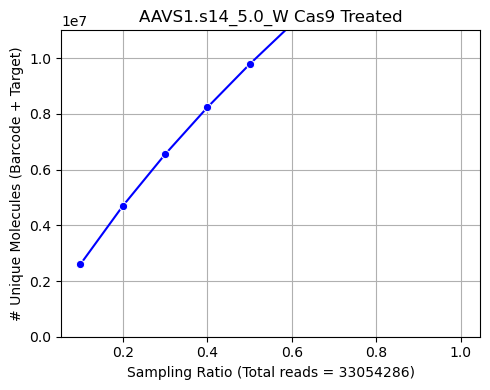

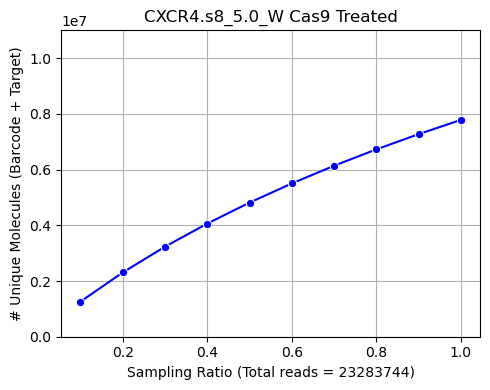

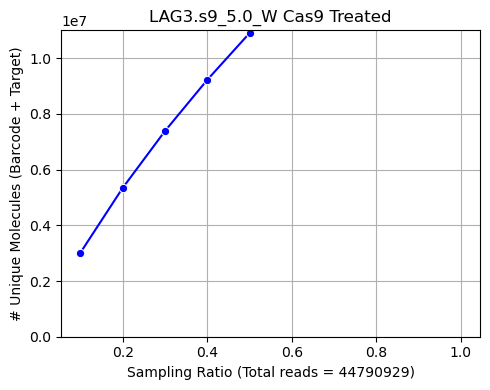

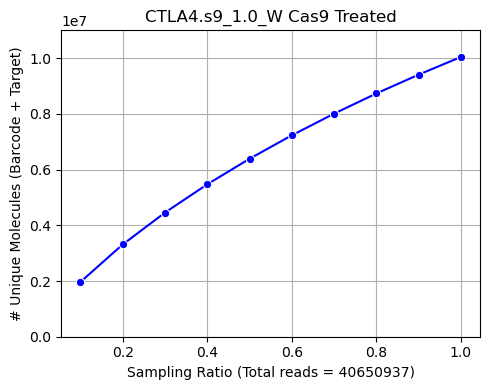

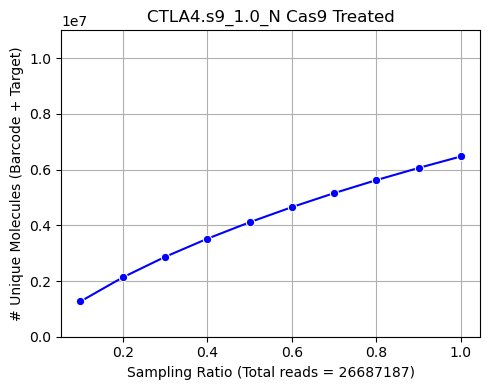

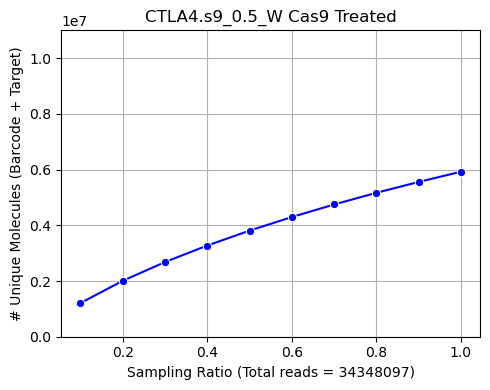

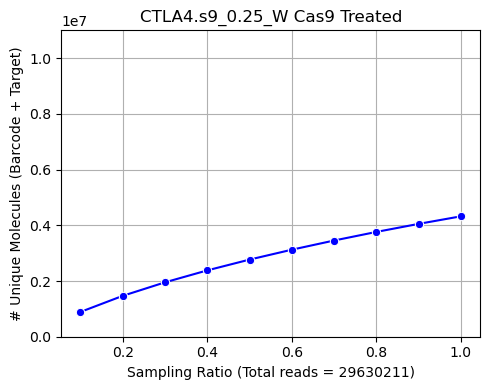

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the folder path
folder_path = "results"
for sample in Cas9_samples:
    summary_df = pd.read_csv(f'{folder_path}/{sample}/summary_counts_for_plot.csv')

    # Calculate the percentage of unique_read_count over total_read_count
    summary_df['unique_to_total_pct'] = (summary_df['unique_read_count'] / summary_df['total_read_count']) * 100

    # Plot the percentage of unique over total
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=summary_df, x='sampling_ratio', y='unique_read_count', marker='o', color='b')

    total = summary_df[summary_df['sampling_ratio']==1.0]['total_read_count'].values[0]

    # Add labels and title
    plt.xlabel(f'Sampling Ratio (Total reads = {total})')
    plt.ylabel('# Unique Molecules (Barcode + Target)')
    plt.title(f'{summary_df["label"][0]} Cas9 Treated')
    # plt.ylim(0,2.3e7)
    plt.ylim(0,1.1e7)
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()